# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter
from scipy.stats import shapiro 

# dfQuick16 = pd.read_csv("CleanData/Quick-400runsClean-PC16.csv")
dfQuickSlow = pd.read_csv("QucikSlow-400runsClean-PC16.csv")

dfReadSlow = pd.read_csv("ReadCSVSlowClean-PC16.csv")
# dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")
# dfQuick16.head()

In [23]:
# dfRead16.head()

In [24]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["worst"] #["best", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        if case != "worst":
            for size in s:
                l.append(calcMean(df, case, size))  
        else :
            for size in [25000,50000,75000,100000,125000,150000,175000,200000]:
                l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfQuickSlowMean = mean_of_dataset(dfQuickSlow)
# dfQuickMean16 = mean_of_dataset(dfQuick16)
# dfQuickMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3128428486.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3128428486.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3128428486.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input cas

In [25]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,125000,150000,175000,200000] #,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

#dfReadMean16 = mean_of_dataset_readCSV(dfRead16)
dfReadSlowMean = mean_of_dataset_readCSV(dfReadSlow)

C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3128428486.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3128428486.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3128428486.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3128428486.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [26]:
dfQuickSlowMean = dfQuickSlowMean.reset_index(drop=True)
dfReadSlowMean = dfReadSlowMean.reset_index(drop=True)
dfQuickSlowMean

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,1457.136068,1291.308662,27.202583,187739.0,65.807692,25000.0,worst
1,6672.986385,5898.095655,125.289281,865919.965517,64.275862,50000.0,worst
2,13244.09167,11736.45813,243.658038,1686120.416667,66.916667,75000.0,worst
3,26755.650662,23678.53021,496.556055,3438923.2,65.92,100000.0,worst
4,44971.909873,39772.994371,838.45272,5812742.272727,64.045455,125000.0,worst
5,53550.857951,47508.650874,972.715154,6746874.166667,66.75,150000.0,worst
6,82389.228847,72996.847207,1512.875968,10497125.0,65.285714,175000.0,worst
7,111065.816656,98370.522267,2045.699108,14194527.272727,65.818182,200000.0,worst


In [27]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [28]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
            case2 = "quickbest"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append((Cc-Rc)/400)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append((Ct-Rt)/400)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append((Cm-Rm)/400)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfQuickSlowMean, dfReadSlowMean)




C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3205959332.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3205959332.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]


C:\Users\langk\AppData\Local\Temp\ipykernel_12524\3205959332.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]


# Shapiro Wilks Test 

In [29]:
#dfQuickSortBest16 = dfQuick16[dfQuick16["Input case"].str.startswith("best")]
dfQuickSortWorst16 = dfQuickSlow[dfQuickSlow["Input case"].str.startswith("worst")]
#dfQuickSortRandom16 = dfQuick16[dfQuick16["Input case"].str.startswith("random")]

print(dfQuickSortWorst16)

           PKG (J)        CPU (J)     DRAM (J)   Time (ms)  Temp (C)  \
0      1454.721252    1290.585510    27.197815    187663.0      68.0   
1      1445.354614    1280.382141    27.169373    187763.0      61.0   
2      1462.105774    1296.619812    27.207581    187718.0      70.0   
3      1448.233765    1283.063110    27.204834    187776.0      61.0   
4      1446.883179    1281.769287    27.204468    187748.0      61.0   
..             ...            ...          ...         ...       ...   
158   95892.746460   85256.678711  1710.875305  11878700.0      71.0   
159   95467.228455   84739.080017  1727.386292  11994800.0      70.0   
160  130120.528015  115011.601868  2436.417969  16884900.0      61.0   
161  129878.645813  114777.355530  2435.617554  16884000.0      68.0   
162  129348.606262  114268.719910  2429.826416  16883500.0      61.0   

    Input case      Size  
0        worst   25000.0  
1        worst   25000.0  
2        worst   25000.0  
3        worst   25000.0  


In [30]:
data = []
size = []
for i in [25000,50000,75000,100000,125000,150000,175000,200000]:
    if 0.05 < shapiro(dfQuickSlow[dfQuickSlow["Size"]==i]["CPU (J)"]).pvalue:
        data.append(1)
    else:
        data.append(0)
    size.append(i)
    print(shapiro(dfQuickSlow[dfQuickSlow["Size"]==i]["CPU (J)"]).pvalue)
print(data)

0.0015544503694400191
5.640691824737587e-07
0.00355418655090034
1.8077915910907905e-06
7.692694452998694e-06
0.23866687715053558
0.00010451104753883556
0.0001704957539914176
[0, 0, 0, 0, 0, 1, 0, 0]


# PLOTS

In [31]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [32]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    n2 = []
    for case in ["worst"]: #["best", "random"]:
        if case == "best":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        elif case == "worst":
            for size in [25000,50000,75000,100000,125000,150000,175000,200000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))
                    n2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn 
    df["n^2"] = n2
calcPercent(dfQuickSlowMean)
dfQuickSlowMean.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
0,1457.136068,1291.308662,27.202583,187739.0,65.807692,25000.0,worst,3.224064,468.828627,0.067715,88.619635,100,3.291779,3.652410e+05,6.250000e+08
1,6672.986385,5898.095655,125.289281,865919.965517,64.275862,50000.0,worst,14.739940,2164.186158,0.312865,88.387647,100,15.052804,7.804820e+05,2.500000e+09
2,13244.09167,11736.45813,243.658038,1686120.416667,66.916667,75000.0,worst,29.334721,4214.603394,0.608716,88.616558,100,29.943437,1.214595e+06,5.625000e+09
3,26755.650662,23678.53021,496.556055,3438923.2,65.92,100000.0,worst,59.189122,8596.520911,1.240910,88.499175,100,60.430032,1.660964e+06,1.000000e+10
4,44971.909873,39772.994371,838.45272,5812742.272727,64.045455,125000.0,worst,99.424681,14530.980147,2.095581,88.439638,100,101.520262,2.116446e+06,1.562500e+10


In [33]:
# print(max(dfQuickMean16[dfQuickMean16["Input case"] == f"worst"]["Time - readCSV"]))

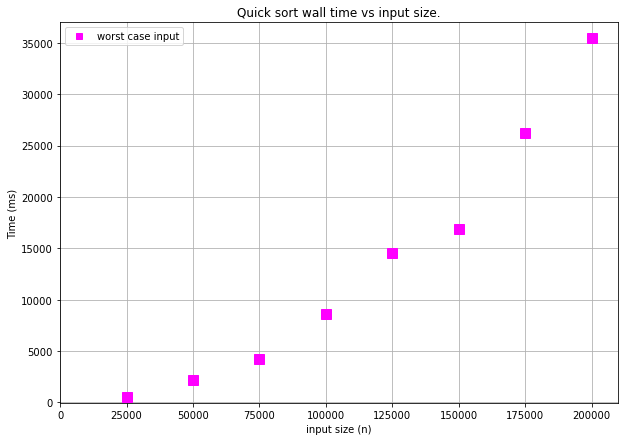

In [34]:
plt.figure(figsize=(10,7))
color = "red"
# plt.plot(0,-111110,"v", color="darkorange",label="random1 - random10")
# plt.plot(0,-1111100,"d", color="green",label="best case input")
plt.plot(0,-1111100,"s", color="fuchsia",label="worst case input")

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v", regLine=False))
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")

worst = polyReg(dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["Size"], dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s", regLine=False)

#best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d", regLine=False)
#print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.xlim(-10,210000)
plt.ylim(-50,37000)
plt.show()


# SQ 2: Time vs. big-oh

worst R2  0.9919101225196834 



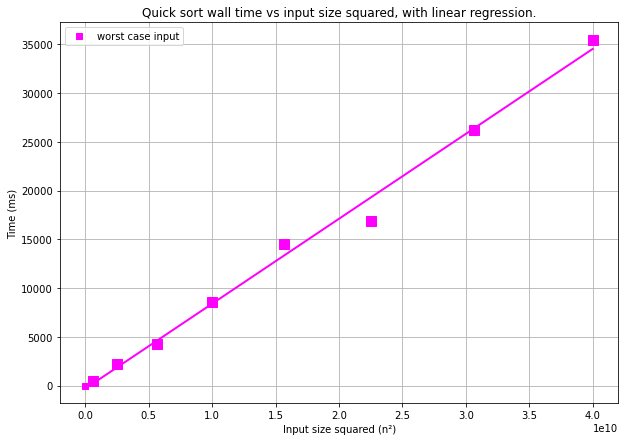

In [35]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(0,0,"v", color="darkorange",label="All random case inputs")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["n^2"], dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
# plt.plot(0,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# E v. T

worst R2  0.9998983429779635 



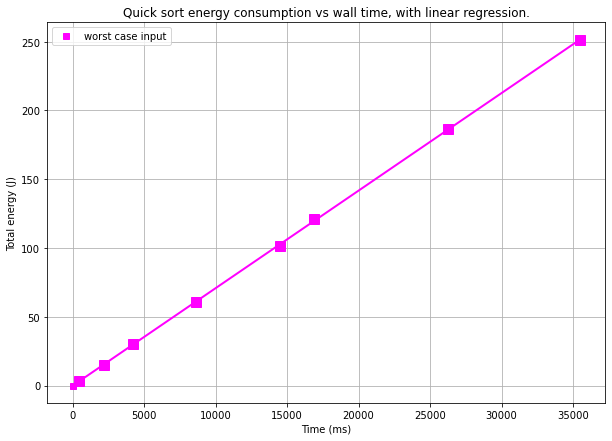

In [36]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

worst = polyReg(dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["Time - readCSV"], dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
# best = polyReg(dfQuickSlowMean[dfQuickSlowMean["Input case"] == "best"]["Time - readCSV"], dfQuickSlowMean[dfQuickSlowMean["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
# for i in range(1,11):
#     Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
# plt.plot(0,0,"d", color="green",label="best case input")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.show()


# EC v. big-oh

worst R2  0.9935391152948868 



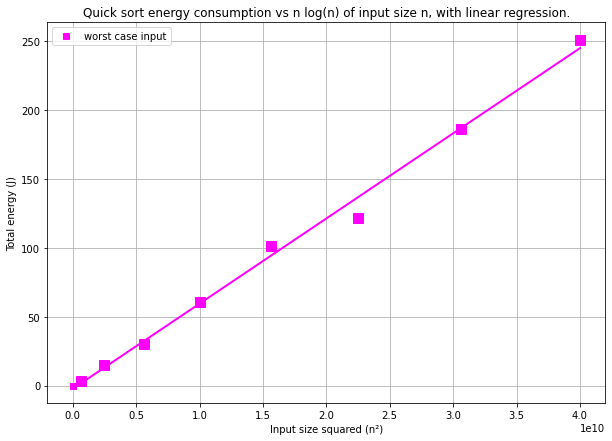

In [37]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# best = polyReg(dfQuickSlowMean[dfQuickSlowMean["Input case"] == "best"]["nlog(n)"], dfQuickSlowMean[dfQuickSlowMean["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
# plt.plot(0000,0000,"d", color="green",label="best case input")
# for i in range(1,11):
#     Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickSlowMean[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(0000,0000,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["n^2"], dfQuickSlowMean[dfQuickSlowMean["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0000,0000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs n log(n) of input size n, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()